# sympy

Since we want to work interactively with `sympy`, we will import the complete module. Note that this polutes the namespace, and is not recommended in general.

In [1]:
from sympy import *

Enable pretty printing in this notebook.

In [2]:
init_printing()

## Expression manipulation

Define a number of symbols to work with, as well as an example expression.

In [3]:
x, y, a, b, c = symbols('x y a b c')

In [4]:
expr = (a*x**2 - b*y**2 + 5)/(c*x + y)

Check the expression's type.

In [5]:
expr.func

sympy.core.mul.Mul

Although the expression was defined as a divisino, it is represented as a multiplicatino by `sympy`.  The `args` attribute of an expressions stores the operands of the top-level operator.

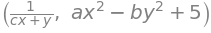

In [6]:
expr.args

Although the first factor appears to be a division, it is in fact a power.  The denominator of this expression would be given by:

In [7]:
expr.args[0].func

sympy.core.power.Pow

In [8]:
expr.args[0].args[0]

The expression $\frac{1}{a x + b}$ can alternatively be defined as follows, which highlights the internal representation of expressions.

In [20]:
expr = Pow(Add(Mul(a, x), b), -1)

In [21]:
pprint(expr)

   1   
───────
a⋅x + b


In [22]:
expr.args

In [23]:
expr.args[0].args[0]

This may be a bit surprising when you look at the mathematical representation of the expression, but the order of the terms is different from its rendering on the screen.

In [24]:
expr.args[0].args

Since the addition operation is commutative, this makes no difference mathematically.

In [27]:
expr.args[0].args[1].args

In [28]:
expr = x**2 + 2*a*x + y**2

In [29]:
expr2 = expr.subs(y, a)
expr2

Most expression manipulation algorithms can be called as functions, or as methods on expressions.

In [73]:
factor(expr2)

In [74]:
expr2.factor()

In [75]:
x, y = symbols('x y', positive=True)

In [76]:
(log(x) + log(y)).simplify()

## Calculus

### Series expansion

In [77]:
x, a = symbols('x a')

In [78]:
expr = sin(a*x)/x

In [79]:
expr2 = series(expr, x, 0, n=7)

In [80]:
expr2

A term of a specific order in a given variable can be selected easily.

In [81]:
expr2.taylor_term(2, x)

When the order is unimportant, or when the expression should be used to define a function, the order term can be removed.

In [82]:
expr2.removeO()

Adding two series deals with the order correctly.

In [83]:
s1 = series(sin(x), x, 0, n=7)

In [84]:
s2 = series(cos(x), x, 0, n=4)

In [85]:
s1 + s2

### Derivatives and integrals

In [86]:
expr = a*x**2 + b*x + c

In [87]:
expr.diff(x)

In [88]:
expr.integrate(x)